In [258]:
#make sure to download all of these packages
#python version that I used was 3.10, but most version of 3 should work
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [259]:
red_wine_data = pd.read_csv("data/winequality-red.csv",delimiter=";")
white_wine_data = pd.read_csv("data/winequality-white.csv",delimiter=";")

In [260]:
red_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [261]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Seems to be no missing data within all of the features at least for red

In [262]:
combined = [red_wine_data,white_wine_data]

In [263]:
fig = go.Figure()
#getting the individual amounts of times the quality(lablels of the wine) appears in the dataset
quality_amounts_red = red_wine_data["quality"].groupby(red_wine_data["quality"]).count()
quality_amounts_white = white_wine_data["quality"].groupby(white_wine_data["quality"]).count()

#adding to a graph
fig.add_trace(go.Bar(x=quality_amounts_red.index,y=quality_amounts_red.values,name="reds"))
fig.add_trace(go.Bar(x=quality_amounts_white.index,y=quality_amounts_white.values,name="white"))

fig.show()

Overall the data set is imbalanced, so a accuracy measure will have to handle imbalanced. There is much more data in white, but at least it appears that they follow similar distribution

<AxesSubplot: >

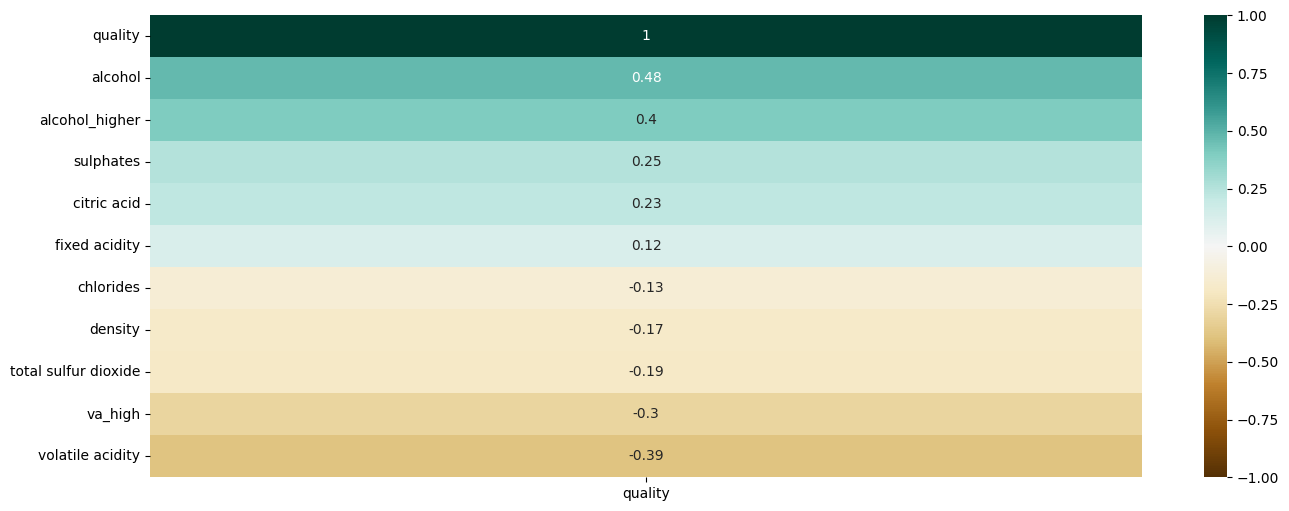

In [289]:
"""
vmin,vmax - the range of values for colormap(min-max)
cmap - sets the specific colormap to use
cetner - takes a float to centera color map
annot - if True sets the correlation values to appear
cbar - if False, the colorbar disapears

"""
plt.figure(figsize=(16,6))
sns.heatmap(red_wine_data.corr()[["quality"]].sort_values(by='quality',ascending=False), annot=True, vmin=-1,vmax=1,cmap='BrBG')

So, this diagram shows the relationship (correlation) between a feature and our label (quality). If the value is high(1) or low(-1) that entails that there is a strong correlation between the label and the quality. Unfortunantly we don't have many high ones of the bat, high ones being (volatile acididty and alcohol). However, this is raw data that we can try nead the data a bit more (binning and such).

<AxesSubplot: >

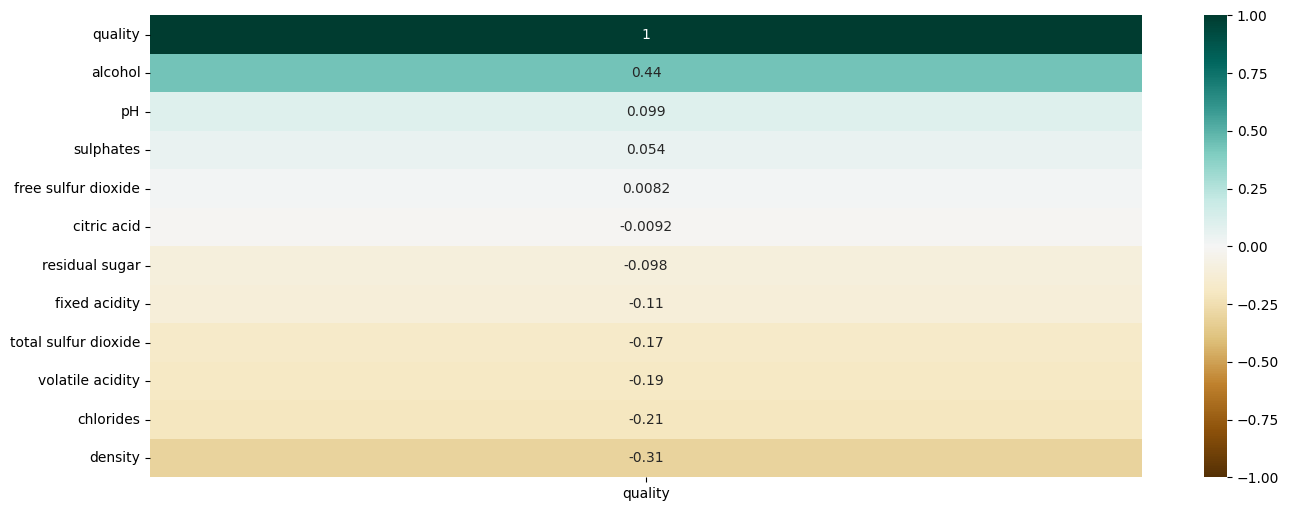

In [265]:
plt.figure(figsize=(16,6))
sns.heatmap(white_wine_data.corr()[["quality"]].sort_values(by='quality',ascending=False), annot=True, vmin=-1,vmax=1,cmap='BrBG')

In white wines it appears that the lowest correlations (between -0.1 and 0.1) are the same (ph,free sulfure dioxide,residual sugar), so it seems fair to drop these from consideration; however it might be worthwhile to check later if there are some values that are throwing off others. For inital EDA these will be dropped

Alcohol shold be included in both

Citric acid and suplates appeared to show strong correlation in red but not white. Will need to combine data sets and do EDA on all at the same time

In [266]:
red_wine_data = red_wine_data.drop(["residual sugar", "pH","free sulfur dioxide"],axis=1)
white_wine_data = white_wine_data.drop(["residual sugar", "pH","free sulfur dioxide","citric acid","sulphates" ],axis=1)

In [267]:
#Alcohol stuff
from plotly.subplots import make_subplots

fig = make_subplots(rows=2,cols=2)

#histogram for red
fig.append_trace(go.Histogram(
    x=red_wine_data["alcohol"],
    nbinsx=10,
    name="red hist"), row=1,col=1)

#boxplot for red
fig.append_trace(go.Box(
    x=red_wine_data["alcohol"],
    name="red box"
),row=1,col=2)

#histogram for white
fig.append_trace(go.Histogram(
    x=white_wine_data["alcohol"],
    nbinsx=10,
    name="white hist"), row=2,col=1)

#boxplot for white
fig.append_trace(go.Box(
    x=red_wine_data["alcohol"],
    name="white box"
),row=2,col=2)

fig.update_layout(height=600, width=800, title_text="Alochol data")
fig.show()

It appears that we have a very similar distribution in both white and red white. We should most likely include the outliers in highest bin in both, and try and bin up the alcohol in both and see if that improves correlation. We will need to decide wheather it is relvent to keep the bin of 8-9% in white or not, and how to handle the same bin in red.  

In [268]:
px.box(red_wine_data,x="quality",y="alcohol",title="Red Wine")

Overall, qualities from 3-6 are pretty static, and I do not think they are really worth binning. However, 7 and 8 might be worth putting in a seperate bin

In [269]:
mean_red = red_wine_data.loc[(red_wine_data["quality"] >= 7)]["alcohol"].mean()
greater_than_mean = red_wine_data.loc[red_wine_data["quality"] < 7]["alcohol"].values >= mean_red

less_than_mean = red_wine_data.loc[(red_wine_data["quality"] >= 7)]["alcohol"].values < mean_red
sum(less_than_mean), sum(greater_than_mean),len(red_wine_data)

(107, 140, 1599)

If we divided the two between these two we only would have conflicts amount a total of 250 classes for alchol (being greater than 6 or less than this). Might want to add as a secondary variables or just replace alcohol. Chances are we will just need to test and see if this leads to overfitting or not.

In [270]:
red_wine_data["alcohol_higher"] = 0
red_wine_data.loc[red_wine_data["alcohol"] >= mean_red, "alcohol_higher"] =1 

In [271]:
px.box(white_wine_data,x="quality",y="alcohol",title="White Wine")

In [272]:
mean_white = white_wine_data.loc[(white_wine_data["quality"] >= 7)]["alcohol"].mean()
greater_than_mean = white_wine_data.loc[white_wine_data["quality"] < 7]["alcohol"].values >= mean_white

less_than_mean = white_wine_data.loc[(white_wine_data["quality"] >= 7)]["alcohol"].values < mean_white
sum(less_than_mean), sum(greater_than_mean),len(white_wine_data)

(518, 593, 4898)

In [273]:
white_wine_data["alcohol_lower"] = 0
white_wine_data["alcohol_higher"] = 0
white_wine_data.loc[white_wine_data["alcohol"] >= mean_red, "alcohol_higher"] =1 
white_wine_data.loc[white_wine_data["alcohol"] < mean_red, "alcohol_lower"] =1

In [274]:
#appears that 3 and 8 are slim, so for red I am going to put 3's band into 4, but leave 8 by itself. Even though it is small it has a really tight grouping so it might be useful
red_wine_data["alcohol"].groupby([red_wine_data["quality"]]).count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: alcohol, dtype: int64

In [275]:
#density seems to be very very small differences, I doubt this will be any help but we can check
red_wine_data["density"].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [276]:
px.box(red_wine_data,x="quality",y="density",title="Red Wine")

In [277]:
px.box(white_wine_data,x="quality",y="density",title="White Wine")

The distribution in both boxplots seem pretty even. Trying to make bins might be plausible if there was more certainty in the different classes, I don't think there is much else we can do except scale the data.

In [278]:
red_wine_data["volatile acidity"].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

There is pretty good standard deviation, so plausible that we might be able to use this data pretty well for banding.

In [279]:
#Alcohol stuff
from plotly.subplots import make_subplots

fig = make_subplots(rows=2,cols=2)

#histogram for red
fig.append_trace(go.Histogram(
    x=red_wine_data["volatile acidity"],
    nbinsx=10,
    name="red hist"), row=1,col=1)

#boxplot for red
fig.append_trace(go.Box(
    x=red_wine_data["volatile acidity"],
    name="red box"
),row=1,col=2)

#histogram for white
fig.append_trace(go.Histogram(
    x=white_wine_data["volatile acidity"],
    nbinsx=10,
    name="white hist"), row=2,col=1)

#boxplot for white
fig.append_trace(go.Box(
    x=red_wine_data["volatile acidity"],
    name="white box"
),row=2,col=2)

fig.update_layout(height=600, width=800, title_text="White wine data")
fig.show()

Both are right skewed, but white seems to not have a great dist (compared to red). Red had a better overall correlation with acid so it might e worthwhile to only worry about red (red=0.41, white=0.17)

In [280]:
px.box(red_wine_data,x="quality",y="volatile acidity",title="Red Wine")

In [281]:
means_of_red = red_wine_data.groupby(red_wine_data["quality"]).mean()
medians_of_red = red_wine_data.groupby(red_wine_data["quality"]).median()

In [282]:
means_of_red["volatile acidity"],medians_of_red["volatile acidity"]

(quality
 3    0.884500
 4    0.693962
 5    0.577041
 6    0.497484
 7    0.403920
 8    0.423333
 Name: volatile acidity, dtype: float64,
 quality
 3    0.845
 4    0.670
 5    0.580
 6    0.490
 7    0.370
 8    0.370
 Name: volatile acidity, dtype: float64)

Seeems that there is possibly 2 different bands we could make. (6-8) and (5) and (3-4)

Bands (enough to make ordinal I thinks): 

less_than_five (values that are lower than 0.6) = 0 

greater_than_and_equal_to_five = (values that are greater than 0.6 ) = 1

In [283]:
greater_than_five = red_wine_data.loc[red_wine_data["quality"] >= 5]
greater_than_five["volatile acidity"].describe()

count    1536.000000
mean        0.519766
std         0.171017
min         0.120000
25%         0.390000
50%         0.510000
75%         0.630000
max         1.330000
Name: volatile acidity, dtype: float64

In [284]:
high_quality_less = greater_than_five.loc[greater_than_five["volatile acidity"] < 0.6]
high_quality_more = greater_than_five.loc[greater_than_five["volatile acidity"] >= 0.6]
print("Amount that fit the band " + str(len(high_quality_less)))
print("Amount that do not fit the band " + str(len(high_quality_more)))

Amount that fit the band 1027
Amount that do not fit the band 509


In [285]:
less_than_five = red_wine_data[red_wine_data["quality"] < 5]
less_than_five["volatile acidity"].describe()

count    63.000000
mean      0.724206
std       0.247970
min       0.230000
25%       0.565000
50%       0.680000
75%       0.882500
max       1.580000
Name: volatile acidity, dtype: float64

In [286]:
high_quality_less = less_than_five.loc[less_than_five["volatile acidity"] <= 0.6]
high_quality_more = less_than_five.loc[less_than_five["volatile acidity"] > 0.6]
print("Amount that fit the band " + str(len(high_quality_more)))
print("Amount that do not fit the band " + str(len(high_quality_less)))

Amount that fit the band 42
Amount that do not fit the band 21


In [287]:
#creating a binary feature
red_wine_data["va_high"] = 0
red_wine_data.loc[red_wine_data["volatile acidity"] >= 0.6, "va_high"] = 1
red_wine_data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,alcohol_higher,va_high
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5,0,1
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5,0,1
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5,0,1
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6,0,0
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5,0,1
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6,0,0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6,0,0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5,0,1


This also might cause overfitting due to the correlation with volatile acididty in general. However, it should at least be helpful in determining red wines better. Check confusion matrix at the end and run models with and without the values

In [288]:
px.box(white_wine_data,x="quality",y="volatile acidity",title="White Wine: volatile acidity")

Little to no difference in the data here. It most likely will only be scaled for white wine

sulphates, cholorides, total sulfur dioxide, citric acid, fixed acidity